In [1]:
# importing the required dependencies

import pandas as pd # python's library for data manipulation and preprocessing
import numpy as np  # python's library for number crunching

import matplotlib            # python's library for visualisation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns        # also python's library for visualisations
color = sns.color_palette()
sns.set_style('darkgrid')


import sklearn                #python's machine learning library
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('datav2_skills.csv')   # reading the data into a pandas dataframe
df.head()                         # calling the first five rows of the dataset

,NumberTokens,FirstPerson,Enclise,Demonstrative,GrammarErrors,SentenceLong,DiscourseMarkers,SpellingCheck,FleshScore,StyleErrors,...,Adverbs,Conjunctions,ConclusionMarkers,finalGrade,filename,understandingGrade,selectinginfoGrade,showknowGrade,solutionGrade,formalGrade
0,498.0,2.0,2.0,2.0,0.0,17.0,15.0,2.0,80.748375,15.0,...,0.098394,0.036145,3.0,800.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,200.0,150.0,200.0,150.0,100.0
1,255.0,3.0,2.0,6.0,0.0,8.0,9.0,4.0,75.864120,7.0,...,0.086275,0.070588,2.0,250.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,50.0,50.0,50.0,50.0,50.0
2,228.0,0.0,1.0,1.0,0.0,9.0,5.0,6.0,68.065530,5.0,...,0.061404,0.030702,5.0,350.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,100.0,50.0,50.0,50.0,100.0
3,245.0,0.0,3.0,1.0,0.0,10.0,4.0,8.0,81.696220,4.0,...,0.089796,0.061224,4.0,500.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,100.0,100.0,100.0,100.0,100.0
4,323.0,1.0,1.0,2.0,0.0,7.0,8.0,10.0,58.940880,10.0,...,0.058824,0.024768,1.0,550.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,150.0,150.0,100.0,0.0,150.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 40 columns):
NumberTokens                   2433 non-null float64
FirstPerson                    2433 non-null float64
Enclise                        2433 non-null float64
Demonstrative                  2433 non-null float64
GrammarErrors                  2433 non-null float64
SentenceLong                   2433 non-null float64
DiscourseMarkers               2433 non-null float64
SpellingCheck                  2433 non-null float64
FleshScore                     2433 non-null float64
StyleErrors                    2433 non-null float64
SimilarityPrompt               2431 non-null float64
NumberDiffWords                2433 non-null float64
FirstPersonNorm                2433 non-null float64
EncliseNorm                    2433 non-null float64
DemonstrativeNorm              2433 non-null float64
GrammarErrorsNorm              2433 non-null float64
DiscourseMarkersNorm           2433 non-null 

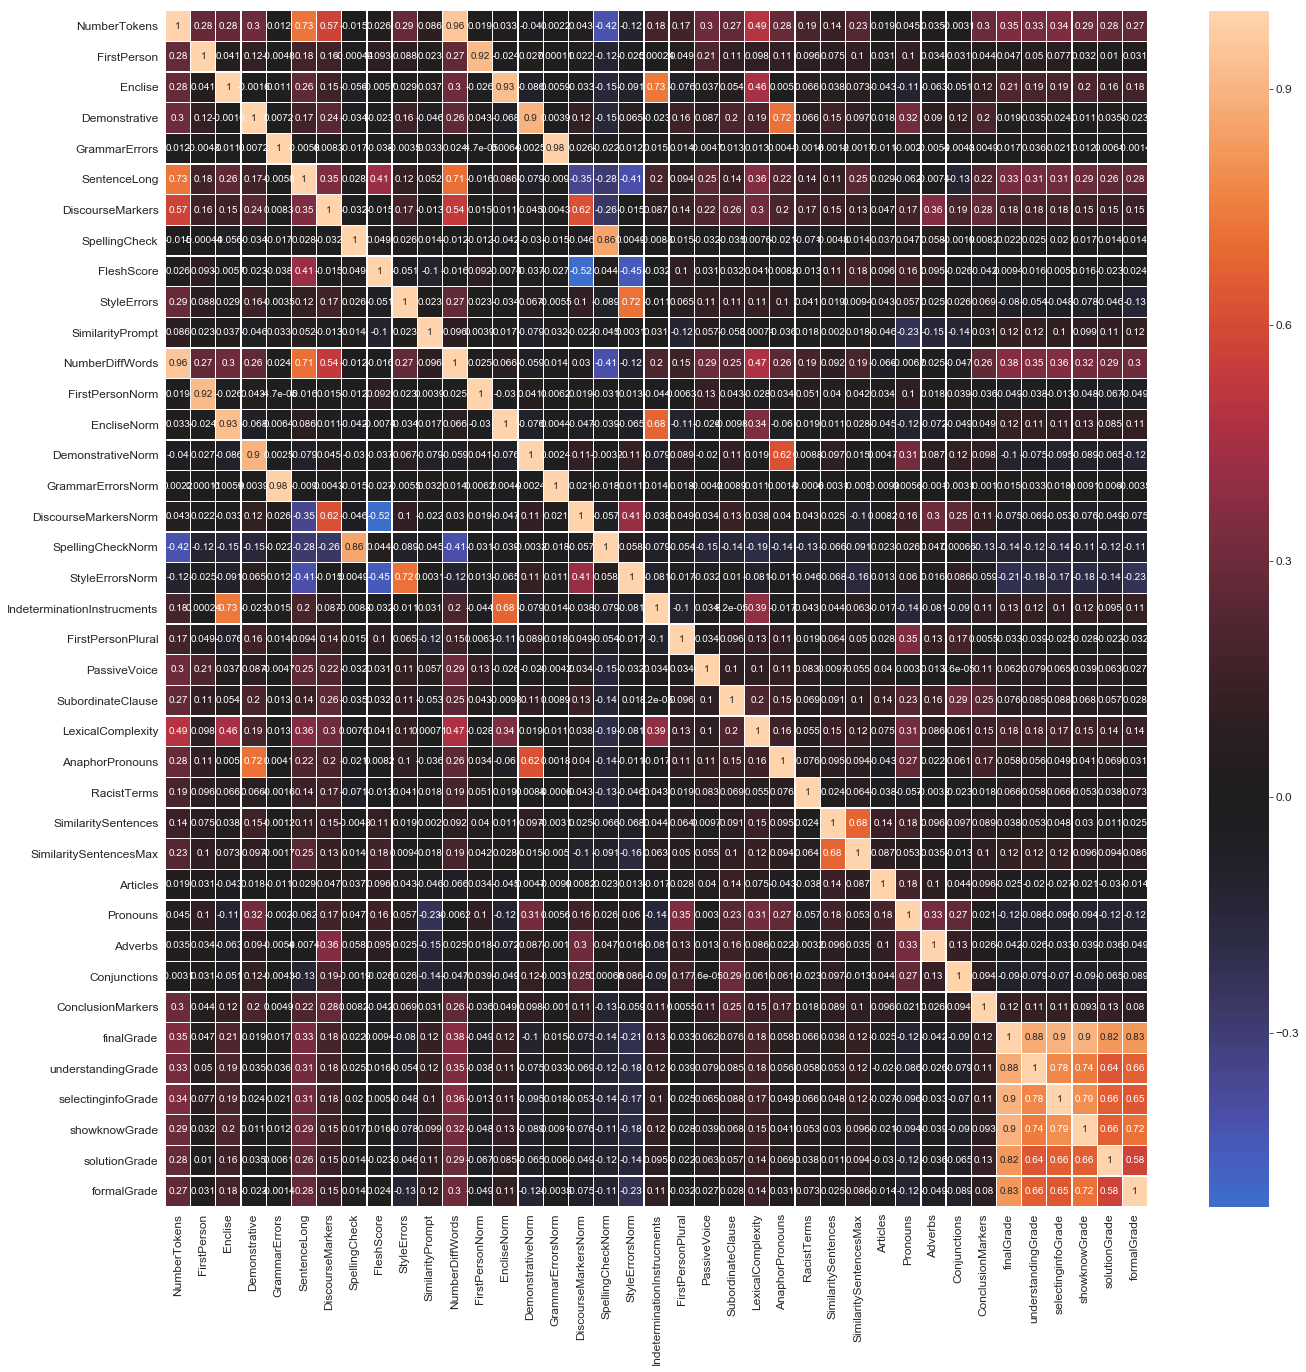

In [4]:
correlation_matrix = df.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(22,22))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=0.3)

In [5]:
corr = df.corr()      # showing correlations by target variable
corr['finalGrade'].sort_values(ascending=False)

finalGrade                     1.000000
showknowGrade                  0.904795
selectinginfoGrade             0.895547
understandingGrade             0.878751
formalGrade                    0.825280
solutionGrade                  0.822013
NumberDiffWords                0.375126
NumberTokens                   0.347461
SentenceLong                   0.332931
Enclise                        0.213407
DiscourseMarkers               0.182678
LexicalComplexity              0.180864
IndeterminationInstrucments    0.127261
EncliseNorm                    0.124836
SimilarityPrompt               0.124640
ConclusionMarkers              0.123769
SimilaritySentencesMax         0.117834
SubordinateClause              0.076145
RacistTerms                    0.066439
PassiveVoice                   0.062175
AnaphorPronouns                0.057518
FirstPerson                    0.047194
SimilaritySentences            0.038445
SpellingCheck                  0.021769
Demonstrative                  0.019292


In [16]:
corr = df.corr()      # showing correlations by target variable
corr['showknowGrade'].sort_values(ascending=False)

showknowGrade                  1.000000
finalGrade                     0.904795
selectinginfoGrade             0.792491
understandingGrade             0.742039
formalGrade                    0.723419
solutionGrade                  0.662833
NumberDiffWords                0.319804
SentenceLong                   0.292603
NumberTokens                   0.291586
Enclise                        0.204977
LexicalComplexity              0.151784
DiscourseMarkers               0.150396
EncliseNorm                    0.126560
IndeterminationInstrucments    0.121205
SimilarityPrompt               0.098578
SimilaritySentencesMax         0.096308
ConclusionMarkers              0.093162
SubordinateClause              0.068341
RacistTerms                    0.052799
AnaphorPronouns                0.040588
PassiveVoice                   0.038768
FirstPerson                    0.031973
SimilaritySentences            0.029683
SpellingCheck                  0.016771
FleshScore                     0.015911


In [6]:
corr = df.corr()      # showing correlations by target variable
corr['selectinginfoGrade'].sort_values(ascending=False)

selectinginfoGrade             1.000000
finalGrade                     0.895547
showknowGrade                  0.792491
understandingGrade             0.779284
solutionGrade                  0.664311
formalGrade                    0.649316
NumberDiffWords                0.363449
NumberTokens                   0.342299
SentenceLong                   0.308826
Enclise                        0.192606
DiscourseMarkers               0.178241
LexicalComplexity              0.172756
SimilaritySentencesMax         0.119520
ConclusionMarkers              0.112832
EncliseNorm                    0.107437
IndeterminationInstrucments    0.104947
SimilarityPrompt               0.102114
SubordinateClause              0.087927
FirstPerson                    0.077224
RacistTerms                    0.066381
PassiveVoice                   0.064609
AnaphorPronouns                0.048824
SimilaritySentences            0.048092
Demonstrative                  0.023567
GrammarErrors                  0.021106


In [5]:
corr = df.corr()      # showing correlations by target variable
corr['understandingGrade'].sort_values(ascending=False)

understandingGrade             1.000000
finalGrade                     0.878751
selectinginfoGrade             0.779284
showknowGrade                  0.742039
formalGrade                    0.662428
solutionGrade                  0.635432
NumberDiffWords                0.350628
NumberTokens                   0.327295
SentenceLong                   0.311574
Enclise                        0.191831
LexicalComplexity              0.177527
DiscourseMarkers               0.176450
SimilarityPrompt               0.121463
IndeterminationInstrucments    0.115775
SimilaritySentencesMax         0.115403
ConclusionMarkers              0.113780
EncliseNorm                    0.110258
SubordinateClause              0.085433
PassiveVoice                   0.078514
RacistTerms                    0.058344
AnaphorPronouns                0.056000
SimilaritySentences            0.053439
FirstPerson                    0.050355
GrammarErrors                  0.036091
Demonstrative                  0.035451


In [7]:
corr = df.corr()      # showing correlations by target variable
corr['solutionGrade'].sort_values(ascending=False)

solutionGrade                  1.000000
finalGrade                     0.822013
selectinginfoGrade             0.664311
showknowGrade                  0.662833
understandingGrade             0.635432
formalGrade                    0.575072
NumberDiffWords                0.294087
NumberTokens                   0.275345
SentenceLong                   0.257555
Enclise                        0.155105
DiscourseMarkers               0.147586
LexicalComplexity              0.137317
ConclusionMarkers              0.132041
SimilarityPrompt               0.105228
IndeterminationInstrucments    0.095083
SimilaritySentencesMax         0.094203
EncliseNorm                    0.085310
AnaphorPronouns                0.069023
PassiveVoice                   0.062925
SubordinateClause              0.057179
RacistTerms                    0.038393
Demonstrative                  0.034642
SpellingCheck                  0.014447
SimilaritySentences            0.010537
FirstPerson                    0.010463


In [8]:
corr = df.corr()      # showing correlations by target variable
corr['formalGrade'].sort_values(ascending=False)

formalGrade                    1.000000
finalGrade                     0.825280
showknowGrade                  0.723419
understandingGrade             0.662428
selectinginfoGrade             0.649316
solutionGrade                  0.575072
NumberDiffWords                0.300853
SentenceLong                   0.277155
NumberTokens                   0.272534
Enclise                        0.176908
DiscourseMarkers               0.145581
LexicalComplexity              0.142497
SimilarityPrompt               0.118285
IndeterminationInstrucments    0.110933
EncliseNorm                    0.109828
SimilaritySentencesMax         0.085947
ConclusionMarkers              0.079753
RacistTerms                    0.073367
AnaphorPronouns                0.031258
FirstPerson                    0.031186
SubordinateClause              0.027978
PassiveVoice                   0.027023
SimilaritySentences            0.024842
FleshScore                     0.024068
SpellingCheck                  0.014143


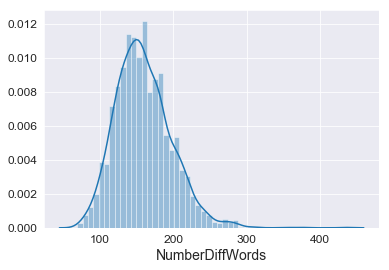

In [9]:
sns.distplot(df.NumberDiffWords) # showing the distribution of the NumberDiffWords variable in the dataset
plt.show()                                  # check the distplot params though. see how you can make it prettier

In [10]:
df["NumberDiffWords"] = np.ceil(df["NumberDiffWords"]/10)

# showing the frequency of each category
df.NumberDiffWords.value_counts().sort_index()

7.0       1
8.0      14
9.0      25
10.0     55
11.0     93
12.0    151
13.0    219
14.0    247
15.0    286
16.0    274
17.0    221
18.0    211
19.0    183
20.0    115
21.0    111
22.0     80
23.0     52
24.0     31
25.0     22
26.0     11
27.0      7
28.0     10
29.0      8
30.0      1
31.0      1
32.0      1
36.0      1
38.0      1
44.0      1
Name: NumberDiffWords, dtype: int64

In [11]:
# Label those above 22 as 22
df["NumberDiffWords"].where(df["NumberDiffWords"] < 22, 22.0, inplace=True)


df.NumberDiffWords.value_counts().sort_index()

7.0       1
8.0      14
9.0      25
10.0     55
11.0     93
12.0    151
13.0    219
14.0    247
15.0    286
16.0    274
17.0    221
18.0    211
19.0    183
20.0    115
21.0    111
22.0    227
Name: NumberDiffWords, dtype: int64

In [12]:
# Label those bellow 11 as 11
df["NumberDiffWords"].where(df["NumberDiffWords"] > 11, 11.0, inplace=True)


df.NumberDiffWords.value_counts().sort_index()


11.0    188
12.0    151
13.0    219
14.0    247
15.0    286
16.0    274
17.0    221
18.0    211
19.0    183
20.0    115
21.0    111
22.0    227
Name: NumberDiffWords, dtype: int64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["NumberDiffWords"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
strat_test_set.head()

print(strat_train_set.shape, strat_test_set.shape)

strat_train_set.to_csv('datav2_train.csv', index=False)

In [19]:
strat_test_set.to_csv('datav2_test.csv', index=False)